#### Customer Segmentation Exploratory Data Analysis

This dataset is of customers from supermarket mall and through membership cards, we have some basic data about customers like Customer ID, age, gender, annual income and spending score. Spending Score is something assigned to the customer based on some defined parameters like customer behavior and purchasing data, etc.

Dataset link: https://www.kaggle.com/datasets/kandij/mall-customers

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ogdata = pd.read_csv("Mall_Customers.csv")
data = ogdata

In [3]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data.shape

(200, 5)

In [6]:
data.size

1000

In [7]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
data = data.rename(columns={"Genre": "Gender", "Annual Income (k$)": "Annual_Income", "Spending Score (1-100)": "Spending_Score"})
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

Gender is statistical data, so replacing Male with 1 and Female with 0

In [11]:
data["Gender"] = data["Gender"].replace(["Male", "Female"], [1,0])
data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


### VISUALIZATION

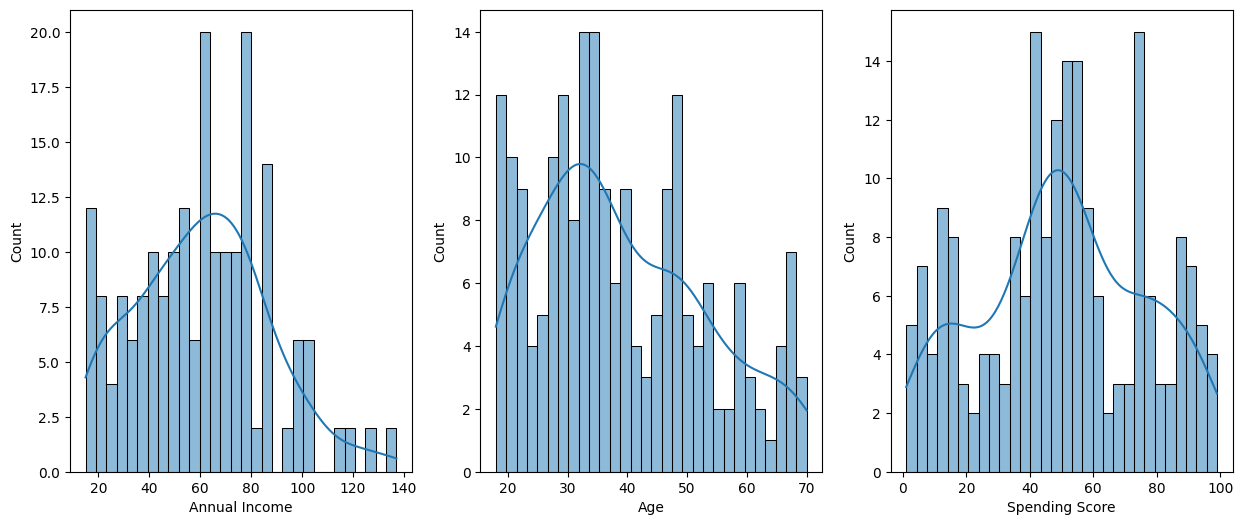

In [12]:
plt.figure(figsize=(15 , 6))
plt.subplot(1,3,1)
sns.histplot(data["Annual_Income"], bins=30, kde=True)
plt.xlabel('Annual Income')
plt.subplot(1,3,2)
sns.histplot(data["Age"], bins=30, kde=True)
plt.xlabel('Age')
plt.subplot(1,3,3)
sns.histplot(data["Spending_Score"], bins=30, kde=True)
plt.xlabel('Spending Score')
plt.show()

Here, from these histograms, we can observe that the values are distributed such that the vast majority of the values lay in the middle with some exceptions in the extremes.

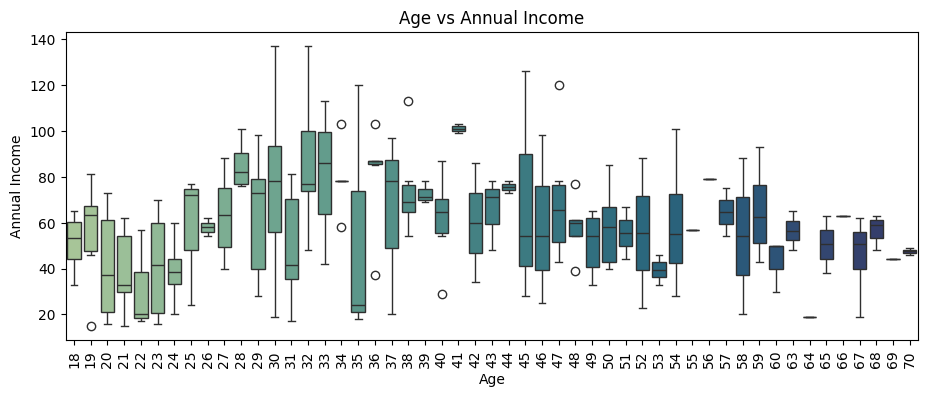

In [13]:
plt.figure(figsize=(11,4))
plot = sns.boxplot(x="Age", hue="Age", y="Annual_Income", data=data, palette="crest",legend=False)
plt.setp(plot.get_xticklabels(), rotation=90)
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

From this boxplot, we can identify the minimum, first quartile (25%), median (50%), third quartile (75%) as well as the maximum annual income for each age value.

In [14]:
data["Gender"].value_counts()

Gender
0    112
1     88
Name: count, dtype: int64

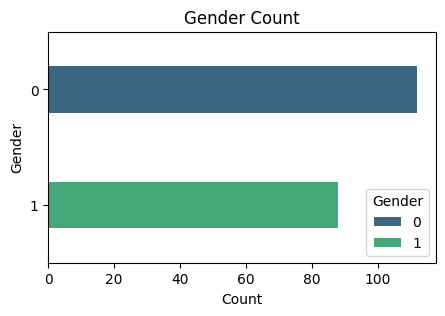

In [15]:
plt.figure(figsize=(5,3))
sns.countplot(y="Gender", data=data, palette="viridis", hue = "Gender", width=0.4)
plt.title('Gender Count')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.show()

From this countplot, we can conclude that number of females are more than male for the given data.

#### Age vs Spending Score

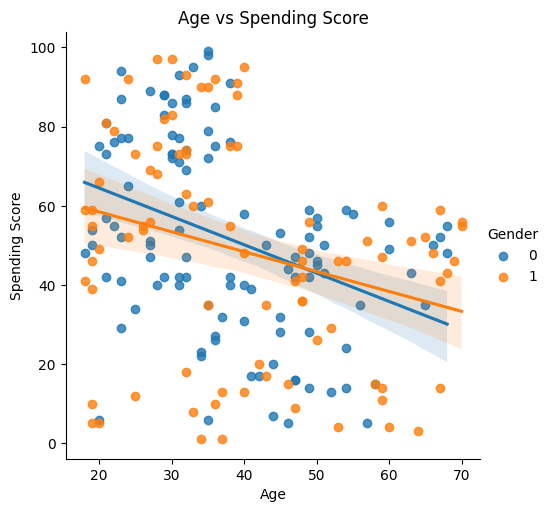

In [16]:
sns.lmplot(x = "Age", y = "Spending_Score", data = data, hue = "Gender")
plt.title('Age vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.show()

From this graph, we can observe that young people (specifically upto age 40) spend more than old people. This is also quite predictable trend.

#### Age vs Annual Income

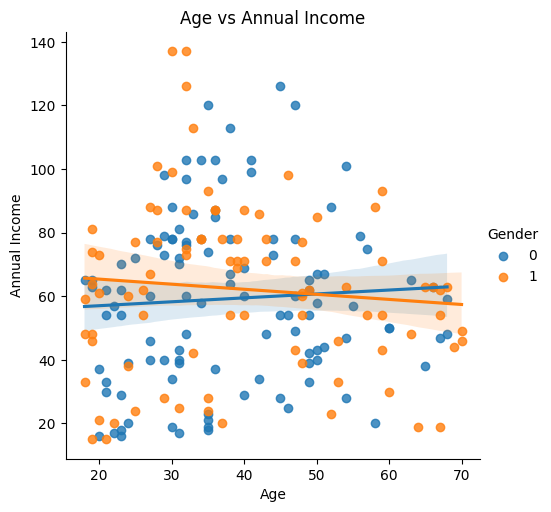

In [17]:
sns.lmplot(x = "Age", y = "Annual_Income", data = data, hue = "Gender")
plt.title('Age vs Annual Income')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.show()

From this graph, we can observe that people in 30s, 40s and 50s have more annual income than other people. We can also see that Males comparatively have a high income than Female.

#### Annual Income vs Spending Score

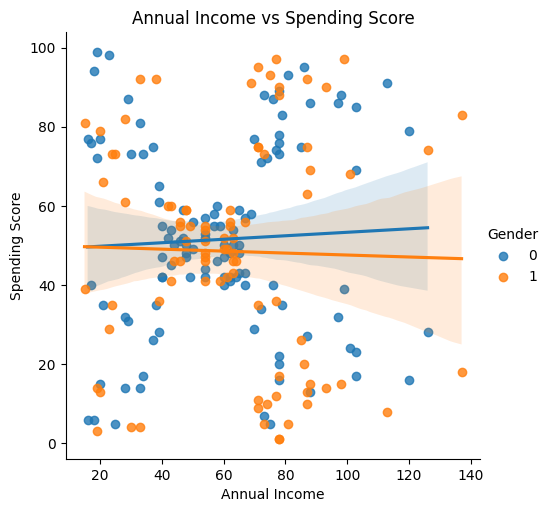

In [18]:
sns.lmplot(x = "Annual_Income", y = "Spending_Score", data = data, hue = "Gender")
plt.title('Annual Income vs Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

From this graph, we can observe that people with either high income or lowest income tend to have high spending score, especially women. The vast majority lies in the middle, having decent income as well as decent spending capability.

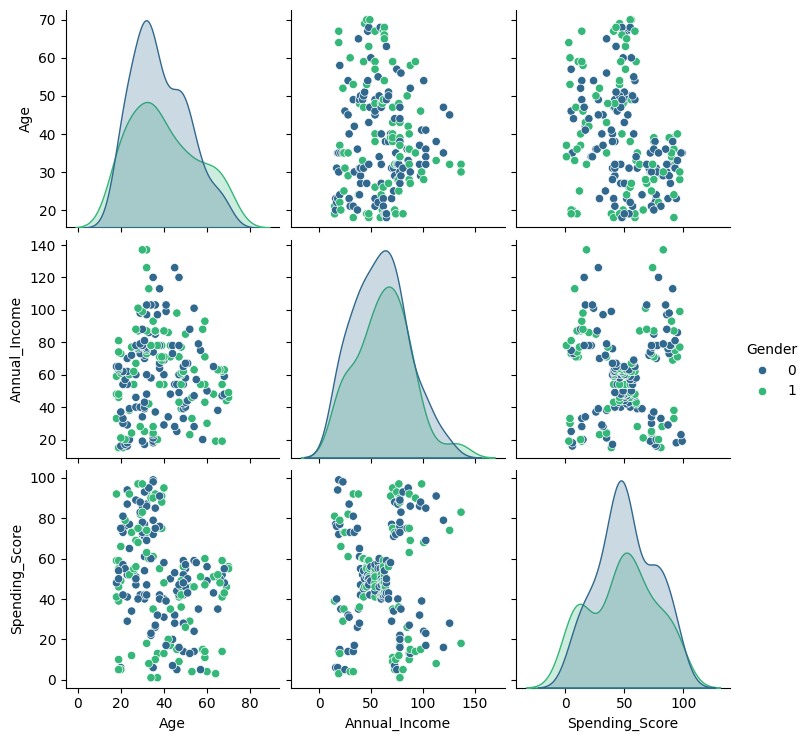

In [19]:
sns.pairplot(data, vars=["Age", "Annual_Income", "Spending_Score"], kind="scatter", hue="Gender", palette="viridis")
plt.show()

In this pairplot, we can observe the relation between different variables in our dataset, using gender as the parameter to segregate.

#### Thank you
#### Customer Segmentation EDA by Jagrati Jain.